# Hands-on exercise 1
## Problem: Getting started with quantum computing

In this exercise you will learn about the basic concepts of quantum computing by creating a quantum circuit for the first **Bell state** using IBM's Qiskit quantum programming language

In [23]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.providers.fake_provider import GenericBackendV2

## Quantum hello world

Let us create a 2-qubit quantum circuit that creates the first Bell state $(|00\rangle+|11\rangle)/\sqrt{2}$ from the vacuum state $|00\rangle$ and visualize it

In [2]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

In [3]:
# Add a Hadamard gate to qubit 0
qc.h(0)

In [4]:
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

In order to extract any information from the quantum state we need to perform measurements

In [5]:
qc.measure_all()

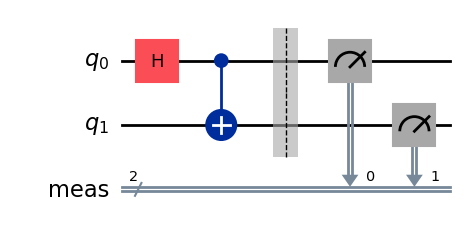

In [6]:
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

Next, let us evaluate the circuit using Qiskit's state-vector simulator Aer. We first need to create an instance of the simulator as backend device and then transpile the circuit for it

In [7]:
backend = AerSimulator()
qc_transpiled = transpile(qc, backend)

Let us now run the transpiled circuit and inspect the result

In [8]:
job = backend.run(qc_transpiled, shots=1000)
result = job.result()
print(result)

Result(backend_name='aer_simulator', backend_version='0.17.0', qobj_id='', job_id='7ac2c6d4-aa4e-4e1b-95ea-e423c4ff6b94', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 521, '0x3': 479}), header=QobjExperimentHeader(creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-166', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=2453838759, metadata={'time_taken': 0.003285651, 'num_bind_params': 1, 'parallel_state_update': 16, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000490996, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 64298, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}, time_taken=0.003285651)], date=20

This output is quite convoluted. If we are just interested in the histogram, we can apply the `get_counts` function on the result

In [9]:
counts = result.get_counts(qc_transpiled)
print(counts)

{'00': 521, '11': 479}


The above output means that the two states $|00\rangle$ and $|11\rangle$ are measured with nearly equal probability which we can also verify by looking at the histogram

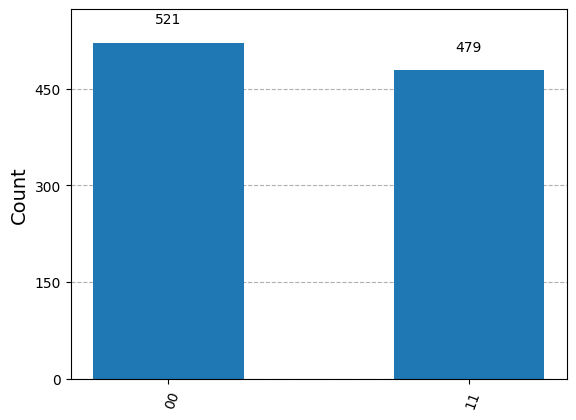

In [10]:
plot_histogram(counts)

## Quantum hello world with noise

Real-world quantum devices are (and possibly will always be) noisy, meaning that their calculation introduces small errors with each quantum gate applied to the quantum state. In what follows we will configure the quantum simulator to perform operations with some simulated noise.

In [11]:
# Create a depolarizing noise model
noise_model = NoiseModel()

error = depolarizing_error(0.05, 1)  # 5% error on 1-qubit gates
noise_model.add_quantum_error(error, ['h'], [0])  # Apply to qubit 0
noise_model.add_quantum_error(error, ['h'], [1])  # Apply to qubit 1

error = depolarizing_error(0.05, 2)  # 5% error on 2-qubit gates
noise_model.add_quantum_error(error, ['cx'], [0, 1])  # Apply to qubits 0, 1

print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['cx', 'h']
  Qubits with noise: [0, 1]
  Specific qubit errors: [('h', (0,)), ('h', (1,)), ('cx', (0, 1))]


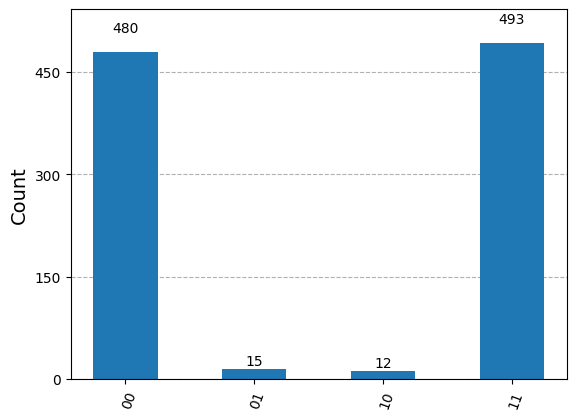

In [12]:
# Create the noisy simulator backend and run the quantum circuit
backend = AerSimulator(noise_model=noise_model)
qc_transpiled = transpile(qc, backend)
job = backend.run(qc_transpiled, shots=1000)
result = job.result()
counts = result.get_counts(qc_transpiled)
plot_histogram(counts)

**Exercise**: Play with the above code snippet to explore how the noise influences the result, e.g., disable noise for the 1-qubit and 2-qubit, respectively, or enlarge the error percentage

## Quantum hello world - one step closer to real hardware

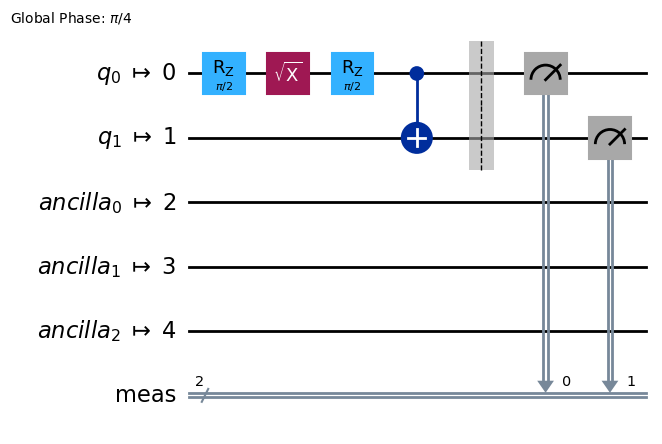

In [13]:
# Generate a 5-qubit simulated backend and transpile the quantum circuit to it
backend = GenericBackendV2(num_qubits=5)
qc_transpiled = transpile(qc, backend)
qc_transpiled.draw("mpl")

The above quantum circuit is different from our original circuit in terms of the *Hadamard gate* (`H`) and the controlled not gate (`CNOT`). This is due to the fact that the Hadamard gate is not a so-called *native* gate of typical quantum hardware devices, and hence, it needs to get transpiled into the hardware's native gateset.

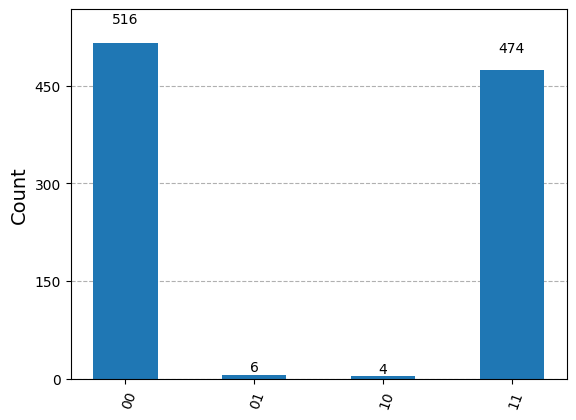

In [14]:
job = backend.run(qc_transpiled, shots=1000)
result = job.result()
counts = result.get_counts(qc_transpiled)
plot_histogram(counts)

## Assignment

Create a quantum circuit that generates the so-called **Greenberger–Horne–Zeilinger** (GHZ) state on `n` qubits
$$
|\Psi\rangle = \frac{|00\dots 0\rangle + |11\dots 1\rangle}{\sqrt{2}}
$$
and execute it on noiseless as well as noisy quantum simulators.